### First ideas:
On the users.csv file we'll:
- Try K-modes,hierarchical clustering and fuzzy c-means

In [61]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

# Load the dataset
df = pd.read_csv("../datasets/users.csv")
display(df)
# Get 1-hot encoded dataset
df_onehot = pd.get_dummies(df)

display(df_onehot)

,CT,CU,LT,TC
0,CT_range_4,CU_range_1,LT_range_4,sport
1,CT_range_1,CU_range_4,LT_range_1,ECommerce
2,CT_range_1,CU_range_5,LT_range_4,ECommerce
3,CT_range_1,CU_range_5,LT_range_4,ECommerce
4,CT_range_1,CU_range_4,LT_range_4,ECommerce
...,...,...,...,...
317,CT_range_2,CU_range_1,LT_range_4,sport
318,CT_range_3,CU_range_1,LT_range_4,sport
319,CT_range_1,CU_range_3,LT_range_4,sport
320,CT_range_2,CU_range_1,LT_range_4,sport


,CT_CT_range_1,CT_CT_range_2,CT_CT_range_3,CT_CT_range_4,CU_CU_range_1,CU_CU_range_3,CU_CU_range_4,CU_CU_range_5,LT_LT_range_1,LT_LT_range_2,LT_LT_range_3,LT_LT_range_4,TC_ECommerce,TC_game,TC_holiday,TC_sport
0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
318,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
319,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
320,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

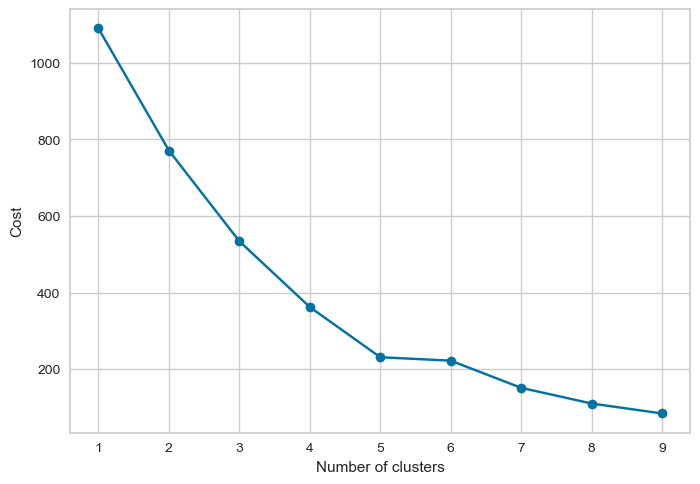

In [62]:
from kmodes.kmodes import KModes
from yellowbrick.cluster import KElbowVisualizer

costs = []
for k in range(1, 10):
    km = KModes(n_clusters=k, init='Huang', n_init=20, verbose=1)
    km.fit(df_onehot)
    costs.append(km.cost_)

# Plot the inertia as a function of k
plt.plot(range(1, 10), costs, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

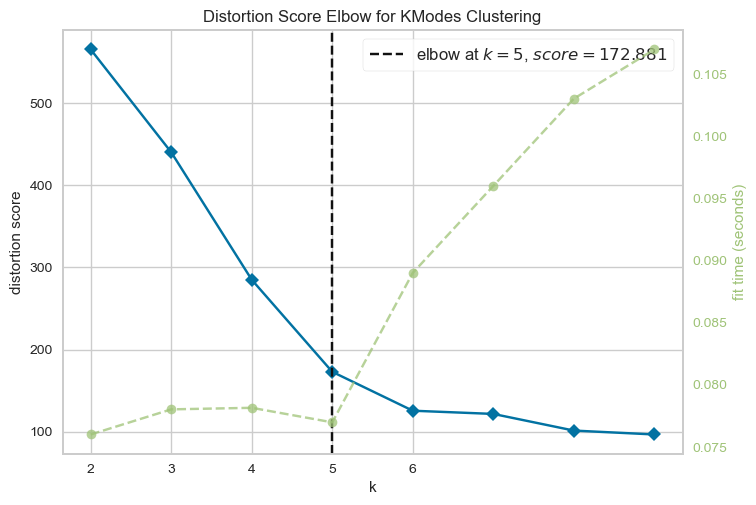

In [63]:
fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KModes(), k=(2,10),ax=ax)
visualizer.fit(df_onehot)
ax.set_xticks(range(2,7))

visualizer.show()
plt.show()

K-Modes

In [64]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def compute_kmodes_clustering_and_scores(df,n_clusters=5):
    df_onehot = df.copy()
    # Perform k-modes clustering
    km = KModes(n_clusters, init='Huang', n_init=20, verbose=1)
    clusters = km.fit_predict(df_onehot)

    # Visualize the clusters using t-SNE
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(df_onehot)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
    plt.show()
    # Visualize the clusters using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_onehot)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.show()

    # Compute the silhouette score
    silhouette = silhouette_score(df_onehot, clusters)
    print("Silhouette score: {:.3f}".format(silhouette))
    # Compute the Calinski-Harabasz index
    calinski = calinski_harabasz_score(df_onehot, clusters)
    print("Calinski-Harabasz index: {:.3f}".format(calinski))
    # Compute the Dunn index
    dunn = davies_bouldin_score(df_onehot, clusters)
    print("Dunn index: {:.3f}".format(dunn))

    return silhouette,calinski,dunn,clusters


Hierarchical clustering

In [65]:
from sklearn.cluster import AgglomerativeClustering
def compute_hierarchical_clustering_and_scores(df, n_clusters=5):
    df_onehot = df.copy()
    # Create an instance of AgglomerativeClustering
    hier_cluster = AgglomerativeClustering(n_clusters, linkage='ward') #'ward', 'complete', 'average', 'single'
    # Fit the model to the data
    hier_cluster.fit(df_onehot)
    # Predict the cluster labels for the data
    clusters = hier_cluster.labels_

    # Visualize the clusters using t-SNE
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(df_onehot)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
    plt.show()

    # Compute the silhouette score
    silhouette = silhouette_score(df_onehot, clusters)
    print("Silhouette score: {:.3f}".format(silhouette))
    # Compute the Calinski-Harabasz index
    calinski = calinski_harabasz_score(df_onehot, clusters)
    print("Calinski-Harabasz index: {:.3f}".format(calinski))
    # Compute the Dunn index
    dunn = davies_bouldin_score(df_onehot, clusters)
    print("Dunn index: {:.3f}".format(dunn))

    return silhouette,calinski,dunn,clusters



Spectral Clustering

In [66]:
from sklearn.cluster import SpectralClustering
def compute_spectral_clustering_and_scores(df, n_clusters=5):
    df_onehot = df.copy()
    spectral_clustering = SpectralClustering(n_clusters)
    clusters = spectral_clustering.fit_predict(df_onehot)

    # Visualize the clusters using t-SNE
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(df_onehot)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
    plt.show()

    # Compute the silhouette score
    silhouette = silhouette_score(df_onehot, clusters)
    print("Silhouette score: {:.3f}".format(silhouette))
    # Compute the Calinski-Harabasz index
    calinski = calinski_harabasz_score(df_onehot, clusters)
    print("Calinski-Harabasz index: {:.3f}".format(calinski))
    # Compute the Dunn index
    dunn = davies_bouldin_score(df_onehot, clusters)
    print("Dunn index: {:.3f}".format(dunn))

    return silhouette,calinski,dunn,clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 503.0
Run 1, iteration: 2/100, moves: 0, cost: 503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 47, cost: 397.0
Run 2, iteration: 2/100, moves: 11, cost: 397.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11, cost: 397.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 49, cost: 249.0
Run 5, iteration: 2/100, moves: 11, cost: 249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 66, cost: 249.0
Run 6, iteration: 2/100, moves: 1, cost: 249.0
Init: initializing centroids
Init: initializ

c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


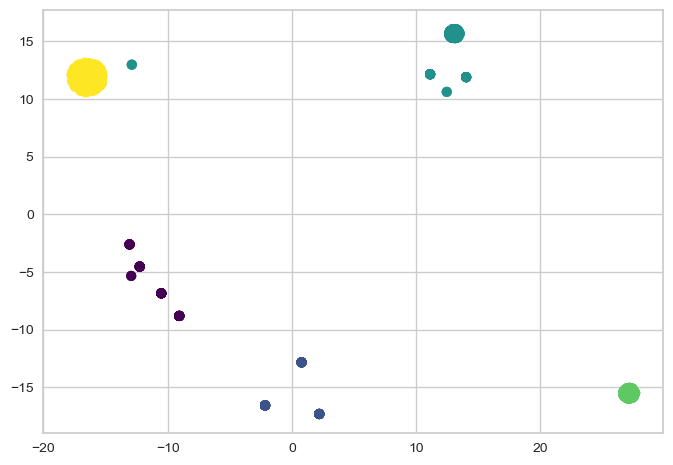

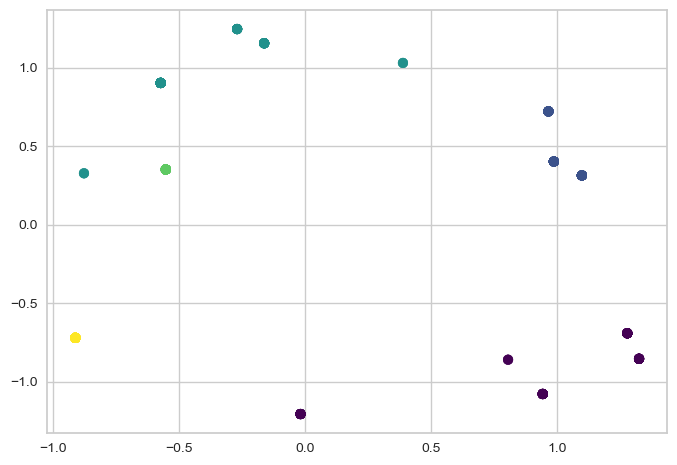

Silhouette score: 0.687
Calinski-Harabasz index: 286.568
Dunn index: 0.754


In [67]:
silhouette_scores_original = []
calinski_scores_original = []
dunn_scores_original = []
s,c,d,clusters_kmodes_original = compute_kmodes_clustering_and_scores(df_onehot,n_clusters = 5)
silhouette_scores_original.append(s)
calinski_scores_original.append(c)
dunn_scores_original.append(d)

c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


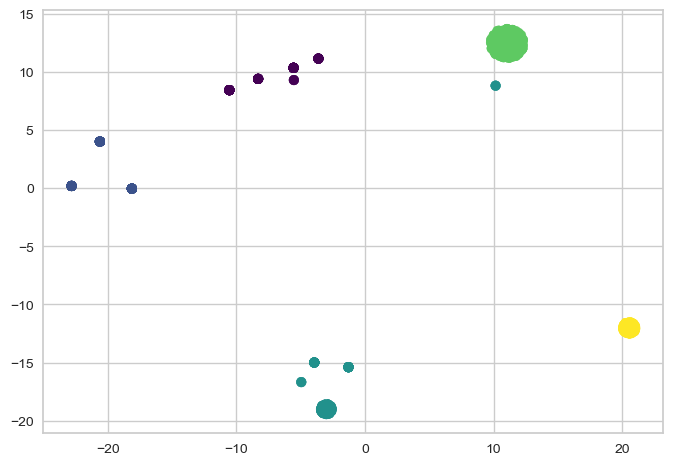

Silhouette score: 0.687
Calinski-Harabasz index: 286.568
Dunn index: 0.754


In [68]:
s,c,d, clusters_hierarchical_original = compute_hierarchical_clustering_and_scores(df_onehot,n_clusters = 5)
silhouette_scores_original.append(s)
calinski_scores_original.append(c)
dunn_scores_original.append(d)

c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


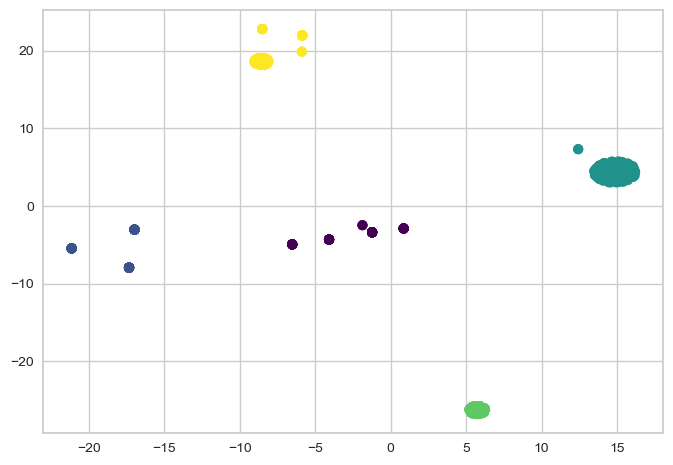

Silhouette score: 0.687
Calinski-Harabasz index: 287.532
Dunn index: 0.758


In [69]:
s,c,d, clusters_spectral_original= compute_spectral_clustering_and_scores(df_onehot,n_clusters = 5)
silhouette_scores_original.append(s)
calinski_scores_original.append(c)
dunn_scores_original.append(d)

# Data Imputation

In [70]:
from dirty_completeness import injection

# Load the dataset
df = pd.read_csv("../datasets/users.csv")
display(df)

# Obtain the list of null-injected datasets
perc = [0.50, 0.40, 0.30, 0.20, 0.10]
df_list = injection(df, 42, "users", "None")

print("\nMissing values per column for each version:")
for ds in df_list:
    print(list(ds.isnull().sum()))

# Save the indexes of the columns that will contain missing values
missing_columns = list(df.columns)

# Colors and shape
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60']
cluster_shape = ['^', 's', 'o']

# Decide on which version we'll apply our imputation algorithms
test_ind = 4  # must be between 0 and 4

# Get 1-hot encoded dataset
df_dirty = df_list[test_ind]

df_lister = []
for i in range(len(df_dirty.columns)):
  df_lister.append(pd.get_dummies(df_dirty[df_dirty.columns[i]].dropna(), prefix=df_dirty.columns[i]).reindex(df_dirty[df_dirty.columns[i]].index))

df_onehot_dirty = pd.concat(df_lister, axis=1)

display(df_onehot_dirty)


,CT,CU,LT,TC
0,CT_range_4,CU_range_1,LT_range_4,sport
1,CT_range_1,CU_range_4,LT_range_1,ECommerce
2,CT_range_1,CU_range_5,LT_range_4,ECommerce
3,CT_range_1,CU_range_5,LT_range_4,ECommerce
4,CT_range_1,CU_range_4,LT_range_4,ECommerce
...,...,...,...,...
317,CT_range_2,CU_range_1,LT_range_4,sport
318,CT_range_3,CU_range_1,LT_range_4,sport
319,CT_range_1,CU_range_3,LT_range_4,sport
320,CT_range_2,CU_range_1,LT_range_4,sport


saved users-completeness50%
saved users-completeness60%
saved users-completeness70%
saved users-completeness80%
saved users-completeness90%

Missing values per column for each version:
[154, 163, 168, 154]
[127, 124, 121, 129]
[102, 98, 101, 99]
[66, 73, 65, 67]
[34, 27, 30, 34]


,CT_CT_range_1,CT_CT_range_2,CT_CT_range_3,CT_CT_range_4,CU_CU_range_1,CU_CU_range_3,CU_CU_range_4,CU_CU_range_5,LT_LT_range_1,LT_LT_range_2,LT_LT_range_3,LT_LT_range_4,TC_ECommerce,TC_game,TC_holiday,TC_sport
0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
318,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
319,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
320,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
# this function accounts for nan even if in our case they are not present. This has been done to follow the lecture approach.
def compute_accuracy(ground_truth, imputed):

    # defining not nulls in the ground truth
    not_nan = ~pd.isna(ground_truth)
    # counting total not nan
    total = np.count_nonzero(not_nan)
    # compare ground_truth and imputed values where there are not nan
    correct = np.count_nonzero((ground_truth[not_nan] == imputed[not_nan]))

    # compute the accuracy
    accuracy = correct / total
    return accuracy

In [72]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import pairwise_distances
import numpy as np

#Note as df_dirty is not one-hot encoded
simple_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent') #alternative “median"
users_imp_mode = simple_imputer.fit_transform(df_dirty.copy()) #learn the mode of each column
users_imp_mode = pd.DataFrame(users_imp_mode, columns=df_dirty.columns) #cast np array to dataframe

print("Most frequent value imputation (categorical df) accuracy: "+'{0:.1f}%'.format(compute_accuracy(df.copy(),users_imp_mode.copy())*100))
users_imp_mode = pd.get_dummies(users_imp_mode)

#default metric is nan_euclidean_distances, this is why we are forced to use the onehot encoded version of the dataset
knn_imputer = KNNImputer(n_neighbors=10)
users_imp_knn = knn_imputer.fit_transform(df_onehot_dirty.copy())
users_imp_knn = pd.DataFrame(users_imp_knn,columns=df_onehot_dirty.columns)

# note as for knn we compare the onehot version of the data
print("KNN imputation (one-hot df) accuracy: "+'{0:.1f}%'.format(compute_accuracy(df_onehot.copy(),users_imp_knn.copy())*100))

Most frequent value imputation (categorical df) accuracy: 95.4%
KNN imputation (one-hot df) accuracy: 96.6%


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47, cost: 482.0
Run 1, iteration: 2/100, moves: 31, cost: 428.0
Run 1, iteration: 3/100, moves: 9, cost: 428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 24, cost: 524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 55, cost: 405.0
Run 3, iteration: 2/100, moves: 2, cost: 405.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 68, cost: 318.0
Run 4, iteration: 2/100, moves: 7, cost: 318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14, cost: 494.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 14, cost: 488.0
Init: initializing centroids
Init: initiali

c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


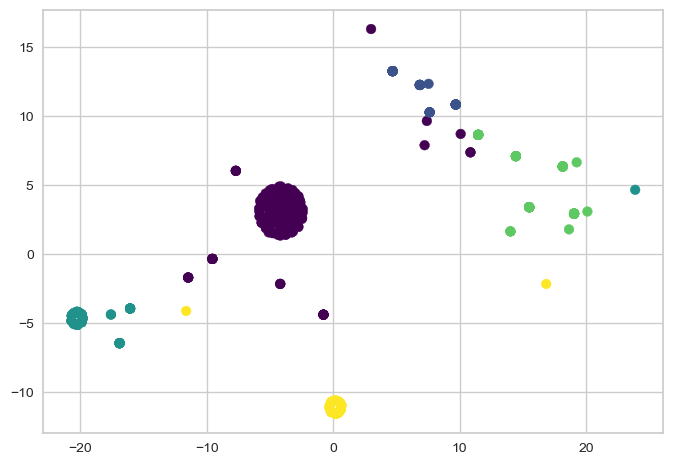

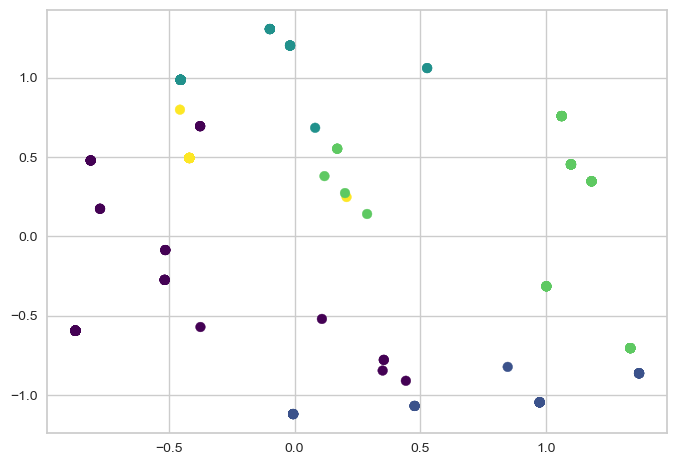

Silhouette score: 0.536
Calinski-Harabasz index: 160.204
Dunn index: 0.900


c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


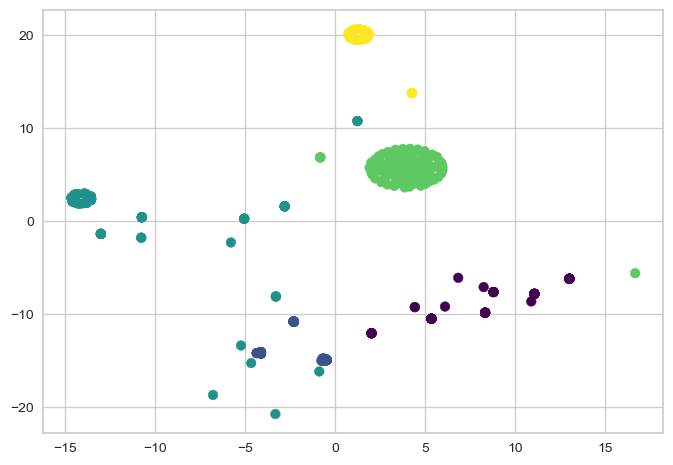

Silhouette score: 0.534
Calinski-Harabasz index: 154.962
Dunn index: 0.970


c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


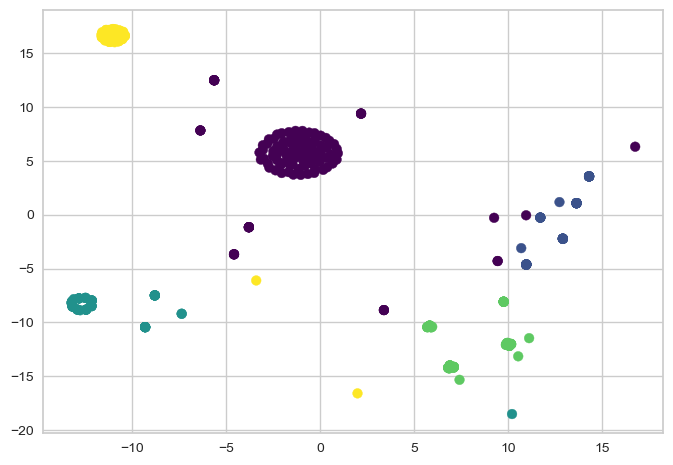

Silhouette score: 0.536
Calinski-Harabasz index: 162.085
Dunn index: 0.903


In [73]:
silhouette_scores_mode = []
calinski_scores_mode = []
dunn_scores_mode = []
s,c,d, clusters_kmodes_mode = compute_kmodes_clustering_and_scores(users_imp_mode, n_clusters=5)

silhouette_scores_mode.append(s)
calinski_scores_mode.append(c)
dunn_scores_mode.append(d)

s,c,d, clusters_hierarchical_mode = compute_hierarchical_clustering_and_scores(users_imp_mode, n_clusters=5)

silhouette_scores_mode.append(s)
calinski_scores_mode.append(c)
dunn_scores_mode.append(d)

s,c,d, clusters_spectral_mode = compute_spectral_clustering_and_scores(users_imp_mode, n_clusters=5)

silhouette_scores_mode.append(s)
calinski_scores_mode.append(c)
dunn_scores_mode.append(d)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 58, cost: 549.0
Run 1, iteration: 2/100, moves: 4, cost: 549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 49, cost: 476.0
Run 2, iteration: 2/100, moves: 0, cost: 476.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 14, cost: 483.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 48, cost: 662.0
Run 4, iteration: 2/100, moves: 0, cost: 662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 55, cost: 537.0
Run 5, iteration: 2/100, moves: 3, cost: 535.0
Run 5, iteration: 3/100, moves: 0, cost: 535.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 20, cost: 535

c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


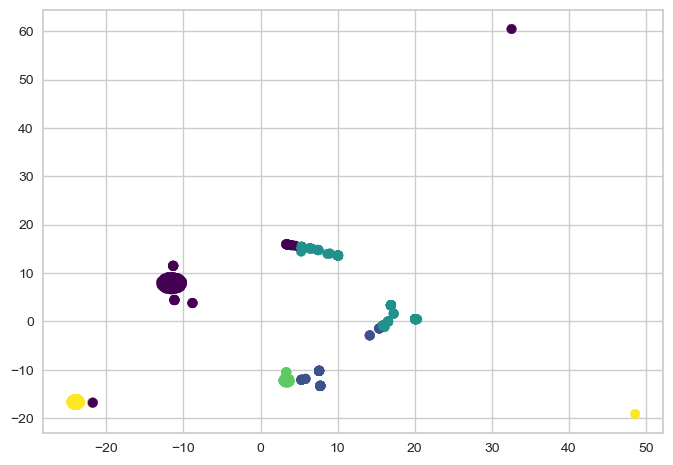

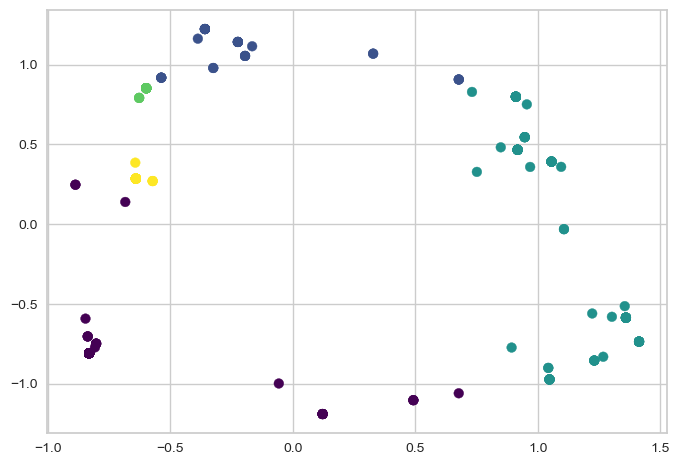

Silhouette score: 0.563
Calinski-Harabasz index: 165.474
Dunn index: 0.859


c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


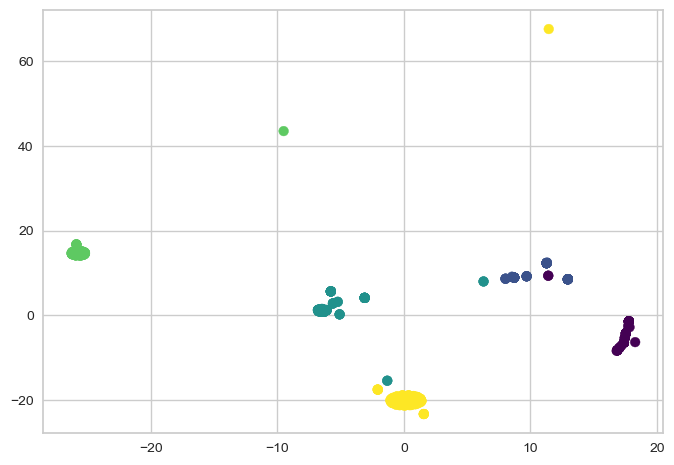

Silhouette score: 0.667
Calinski-Harabasz index: 291.271
Dunn index: 0.758


c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


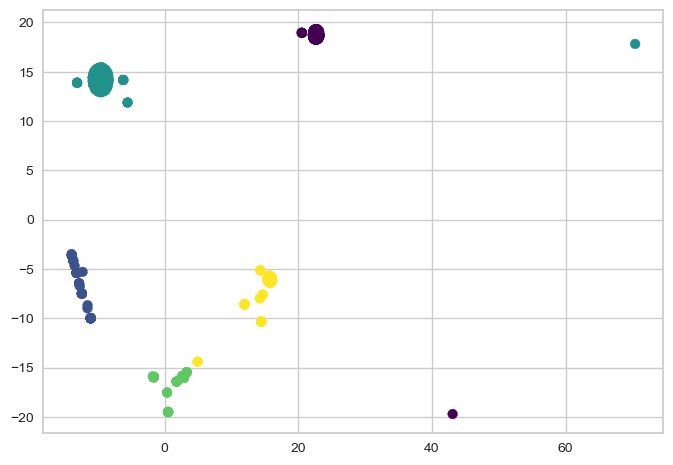

Silhouette score: 0.671
Calinski-Harabasz index: 297.512
Dunn index: 0.751


In [74]:
silhouette_scores_knn = []
calinski_scores_knn = []
dunn_scores_knn = []

s,c,d, clusters_kmodes_knn = compute_kmodes_clustering_and_scores(users_imp_knn, n_clusters=5)

silhouette_scores_knn.append(s)
calinski_scores_knn.append(c)
dunn_scores_knn.append(d)

s,c,d, clusters_hierarchical_knn = compute_hierarchical_clustering_and_scores(users_imp_knn, n_clusters=5)

silhouette_scores_knn.append(s)
calinski_scores_knn.append(c)
dunn_scores_knn.append(d)

s,c,d, clusters_spectral_knn = compute_spectral_clustering_and_scores(users_imp_knn, n_clusters=5)

silhouette_scores_knn.append(s)
calinski_scores_knn.append(c)
dunn_scores_knn.append(d)


In [75]:
print("original silhouette scores mean: "+ str(np.mean(silhouette_scores_original)) + " var: " + str(np.var(silhouette_scores_original)))
print("mode silhouette scores mean: "+ str(np.mean(silhouette_scores_mode)) + " var: " + str(np.var(silhouette_scores_mode)))
print("knn silhouette scores mean: "+ str(np.mean(silhouette_scores_knn)) + " var: " + str(np.var(silhouette_scores_knn))+'\n')

print("original calinski scores mean: "+ str(np.mean(calinski_scores_original)) + " var: " + str(np.var(calinski_scores_original)))
print("mode calinski scores mean: "+ str(np.mean(calinski_scores_mode)) + " var: " + str(np.var(calinski_scores_mode)))
print("knn calinski scores mean: "+ str(np.mean(calinski_scores_knn)) + " var: " + str(np.var(calinski_scores_knn))+'\n')

print("original dunn scores mean: "+ str(np.mean(dunn_scores_original)) + " var: " + str(np.var(dunn_scores_original)))
print("mode dunn scores mean: "+ str(np.mean(dunn_scores_mode)) + " var: " + str(np.var(dunn_scores_mode)))
print("knn dunn scores mean: "+ str(np.mean(dunn_scores_knn)) + " var: " + str(np.var(dunn_scores_knn))+'\n')


original silhouette scores mean: 0.6873510221583848 var: 9.69734600407395e-09
mode silhouette scores mean: 0.5351968321689721 var: 6.593480928144354e-07
knn silhouette scores mean: 0.6339060696738598 var: 0.002503594683583814

original calinski scores mean: 286.8893737132992 var: 0.20650384978197192
mode calinski scores mean: 159.08355314420402 var: 9.082754070802794
knn calinski scores mean: 251.4192358682285 var: 3699.7840602075903

original dunn scores mean: 0.7556411763137362 var: 2.8918822358061126e-06
mode dunn scores mean: 0.924267909897666 var: 0.0010281952345641255
knn dunn scores mean: 0.7892707050942086 var: 0.0024606581403821275



In [76]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, completeness_score
def compute_clusters_comparison_scores(ground_truth, predictions):
    # ground_truth and predictions are the true labels and the clustering result, respectively
    ami = adjusted_mutual_info_score(ground_truth, predictions)
    ari = adjusted_rand_score(ground_truth, predictions)
    completeness = completeness_score(ground_truth, predictions)

    return ami,ari,completeness

In [77]:
ami_k_m,ari_k_m,completeness_k_m = compute_clusters_comparison_scores(clusters_kmodes_original,clusters_kmodes_mode)
ami_k_k,ari_k_k,completeness_k_k = compute_clusters_comparison_scores(clusters_kmodes_original,clusters_kmodes_knn)

ami_h_m,ari_h_m,completeness_h_m = compute_clusters_comparison_scores(clusters_hierarchical_original,clusters_hierarchical_mode)
ami_h_k,ari_h_k,completeness_h_k = compute_clusters_comparison_scores(clusters_hierarchical_original,clusters_hierarchical_knn)

ami_h_k,ari_h_k,completeness_s_m = compute_clusters_comparison_scores(clusters_spectral_original,clusters_spectral_mode)
ami_h_k,ari_h_k,completeness_s_k = compute_clusters_comparison_scores(clusters_spectral_original,clusters_spectral_knn)

print("mode imputation ami scores mean: "+ str(np.mean([ami_k_m,ami_h_m,ami_h_m])) + " var: " + str(np.var([ami_k_m,ami_h_m,ami_h_m]))+'\n')
print("mode imputation ari scores mean: "+ str(np.mean([ari_k_m,ari_h_m,ari_h_m])) + " var: " + str(np.var([ari_k_m,ari_h_m,ari_h_m]))+'\n')
print("mode imputation completeness scores mean: "+ str(np.mean([completeness_k_m,completeness_h_m,completeness_s_m])) + " var: " + str(np.var([completeness_k_m,completeness_h_m,completeness_s_m]))+'\n')

print("knn imputation ami scores mean: "+ str(np.mean([ami_k_k,ami_h_k,ami_h_k])) + " var: " + str(np.var([ami_k_k,ami_h_k,ami_h_k]))+'\n')
print("knn imputation ari scores mean: "+ str(np.mean([ari_k_k,ari_h_k,ari_h_k])) + " var: " + str(np.var([ari_k_k,ari_h_k,ari_h_k]))+'\n')
print("knn imputation completeness scores mean: "+ str(np.mean([completeness_k_k,completeness_h_k,completeness_s_k])) + " var: " + str(np.var([completeness_k_k,completeness_h_k,completeness_s_k]))+'\n')

mode imputation ami scores mean: 0.7853817707130131 var: 0.0035516596953311694

mode imputation ari scores mean: 0.7544279391753168 var: 0.006738700262844583

mode imputation completeness scores mean: 0.7788988493554898 var: 0.0020696968109049025

knn imputation ami scores mean: 0.8804912097489463 var: 0.011223299946429658

knn imputation ari scores mean: 0.8474633246089277 var: 0.02602110468593817

knn imputation completeness scores mean: 0.8843506682480319 var: 0.007635623610658231

